In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [2]:
#Read the data

data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Inspection

In [3]:
#Shape of data

data.shape

(167, 10)

In [4]:
#Basic information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
#Describing the statistics of the data

data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


-------------------------
<font color='darkblue'>-Dataframe has data about various countries and their socio-economic factors.<br>-Few are in % and others in absolute values.<br>-Dataframe has 10 Columns and 167 Rows.<br>- One variable is 'Object' Type, and rest all are 'Int' or 'Float' type.<br>-Descriptive Statistics tells us that there is variablity in the data, and will require scaling before model building.</font>

In [6]:
#Checking null values

100 * data.isnull().sum() / len(data)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

<font color='darkblue'> The dataset is not having any missing values.</font>

In [7]:
#Dropping for duplicate data

data.drop_duplicates(subset=None,inplace=True)
data.shape

(167, 10)

<font color='darkblue'> The dataset does not contain any duplicate records as the shape of the data remains same after dropping duplicates.</font>

### Data Transformation

----------------------

    -In our dataset, the 'imports', 'exports' and 'health' variable seems to be in percentage of GDP per capita, and  this can sometimes give a incorrect insight in our EDA.
    -For example, the health spending of 'United states' is 17.9 and that of 'Sierra Leone' is '13.1',both of which are very close to each other in health spending in terms of their % of GDP per capita, but these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is.
    -So the best way to tackle it is to convert the % values to ABSOLUTE values.

In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [9]:
data['imports'] = round(data['gdpp'] * (data['imports'] / 100),2)
data['exports'] = round(data['gdpp'] * (data['exports'] / 100),2)
data['health'] = round(data['gdpp'] * (data['health'] / 100),2)

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


### Outlier Treatment

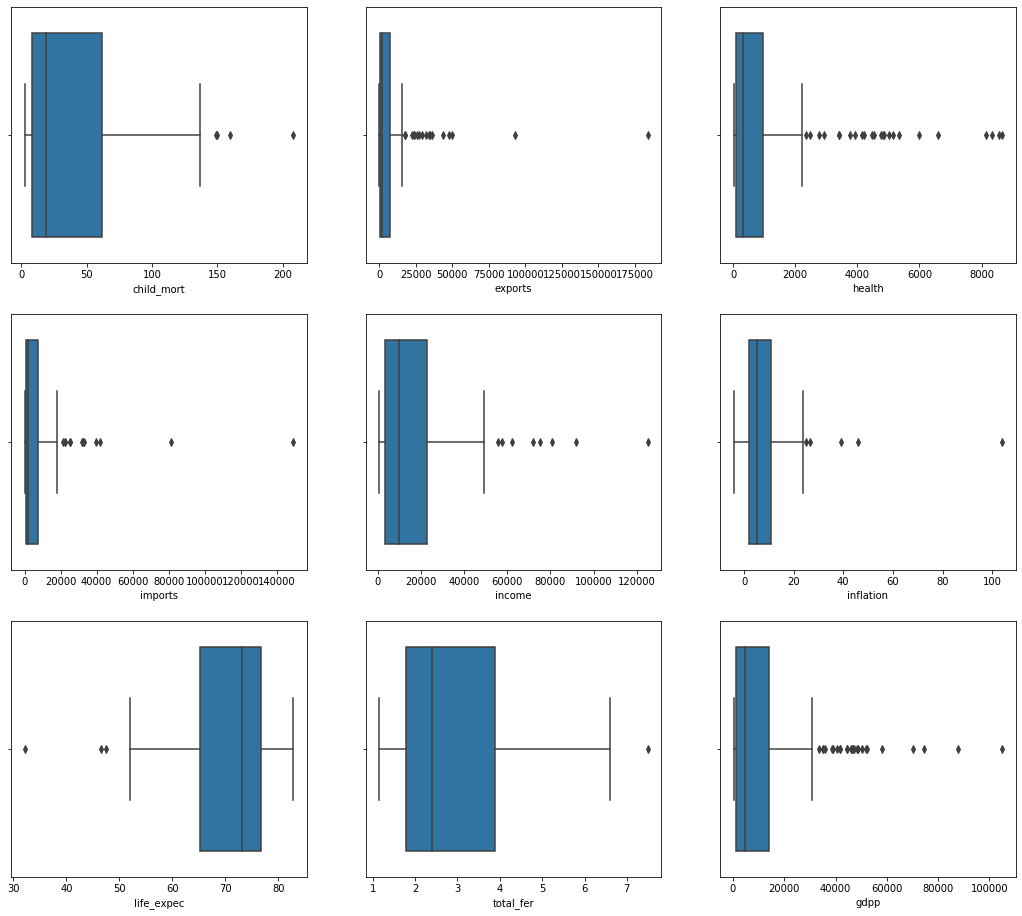

In [10]:
columns = data.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[columns[i]])

-----------------------
<font color='darkblue'>-There seems to be outliers in every single variable. <br>-This is a very delicate situation in terms of Business problem statement & Clustering analysis. <br>-If we apply outlier treatment by CAPPING, this will change the ranking of few countries with respect to requirement of Financial Aid, also we will still have some outlier present after Capping, so it's not a wise decision in this business scenario. <br>-If we apply outlier treatment by deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid.<br>-If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster.<br><br>-After considering all these scenarios, I've decided to go with the model which suits the Business Problem better. That is, not to treat the Outlier, and check the model with different K values to see which one gives a better business outcome.</font>

### EDA

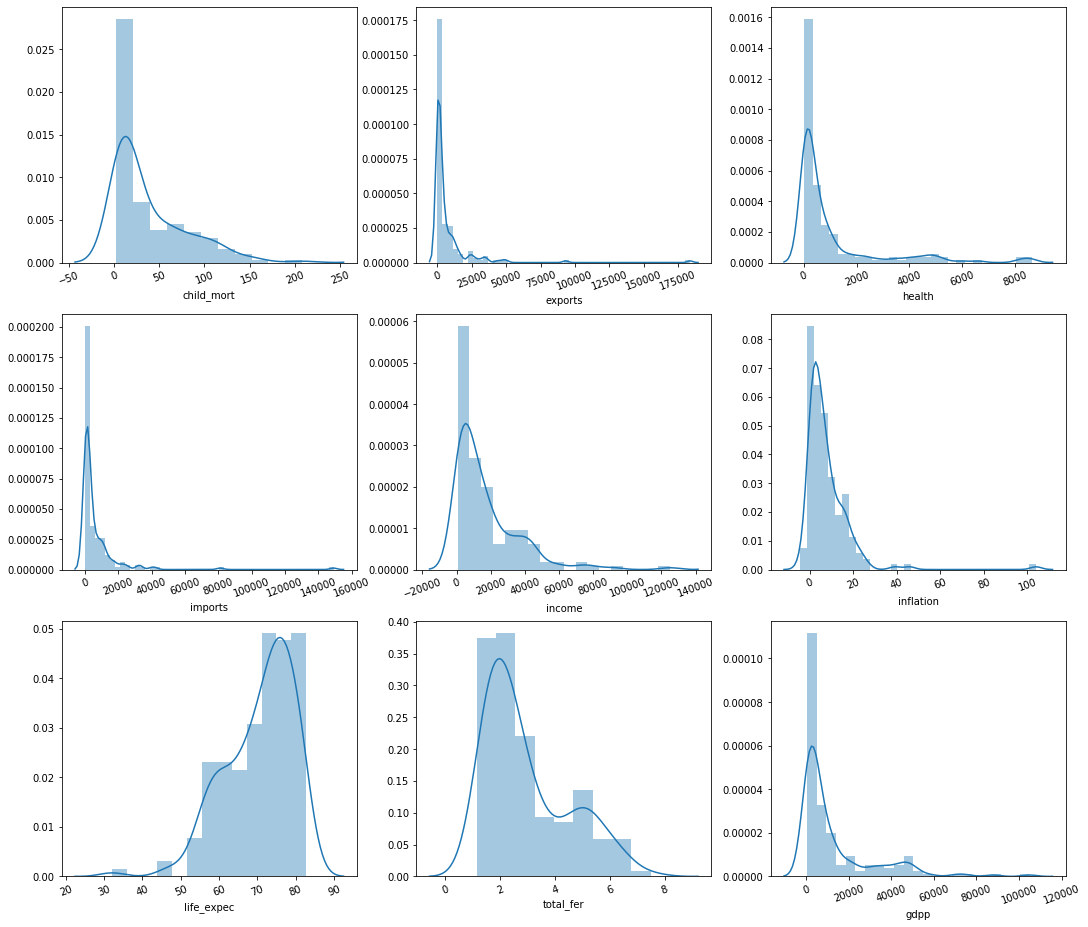

In [11]:
plt.figure(figsize=(18,16))
for i in range(9):
    plt.subplot(3,3,i+1)
    sns.distplot(data[columns[i]])
    plt.xticks(rotation=20)

---
<font color='darkblue'>-Most of the data point are 'NOT Normally' distributed.<br> -Their variance as well as their range are different.<br>-All the above points indicate the need of standardising the data before we build the model.<br>-Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range.<br><br>-Thus, scaling down of all attributes to the same normal scale is important here.</font>

### Hopkins Statistics : Cluster Tendency

---

    -Before we apply any clustering algorithm to the given data,  it is very much important to check whether the given data has some meaningful clusters or not, which in  general means the given data is not random.
    -The process to evaluate the data, to check if the data is feasible for clustering or not is know as the clustering     tendency.
    -To check cluster tendency, we use Hopkins test.
    -Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
#Running the Hopkins test atleast for 10 times to ensure cluster tendency

for i in range(10):
    print(hopkins(data.drop('country',axis=1)))


0.9386316297348606
0.9627961944496589
0.9411334268460896
0.9749556577938976
0.9716184181035892
0.9558761853232077
0.9761586163548777
0.9460669153355334
0.9659334819406061
0.9578453601808775


---
<font color='darkblue'>-Hopkins Statistic over .70 is a good score that indicated that the data is good for cluster analysis.<br>-A Hopkins Statistic value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.<br><br>-For the given dataset, average Hopkins Statistics value is more than .90 which reflects the dataset is highly clustered.</font>

### Scaling

In [14]:
#We will use Standardisation method for scaling the data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data.drop('country',axis=1)))
scaled_data.columns = data.select_dtypes(exclude='object').columns
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178770,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Clustering

## K-Means

----------------

#### SSD(Elbow Curve)

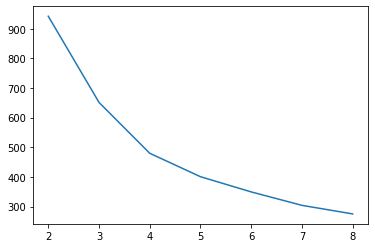

In [15]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(scaled_data)
    
    ssd.append([k,kmeans.inertia_])
    
# plot the SSDs for each n_clusters
# ssd
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### Silhouette Analysis

$$Silhouette score = \frac{p-q}{max(p,q)}$$
<font color='darkblue'>
 
    -p  is the mean distance to the points in the nearest cluster that the data point is not a part of.
    -q  is the mean intra-cluster distance to all the points in its own cluster.

    -The value of the silhouette score range lies between -1 to 1.
    -A score closer to 1 indicates that the data point is very similar to other data points in the cluster.
    -A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [16]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for k in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, max_iter=50)
    kmeans.fit(scaled_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4586330624596812
For n_clusters=3, the silhouette score is 0.4218615748313596
For n_clusters=4, the silhouette score is 0.4291471068336936
For n_clusters=5, the silhouette score is 0.4324001111446476
For n_clusters=6, the silhouette score is 0.39279369057014213
For n_clusters=7, the silhouette score is 0.31136565275034395
For n_clusters=8, the silhouette score is 0.31267945114303664


<font color='darkblue'>-From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used.<br>-We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results.</font>

### First Iteration - Using 3 Clusters

In [17]:
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [18]:
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [19]:
#Creating a dataset for finding out K_Means different clusters

data_K_means = data.copy()
data_K_means['cluster_id_3'] = kmeans_3.labels_
data_K_means.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [20]:
data_K_means.cluster_id_3.value_counts()

2    91
0    48
1    28
Name: cluster_id_3, dtype: int64

#### Visualizing the Clustered Data

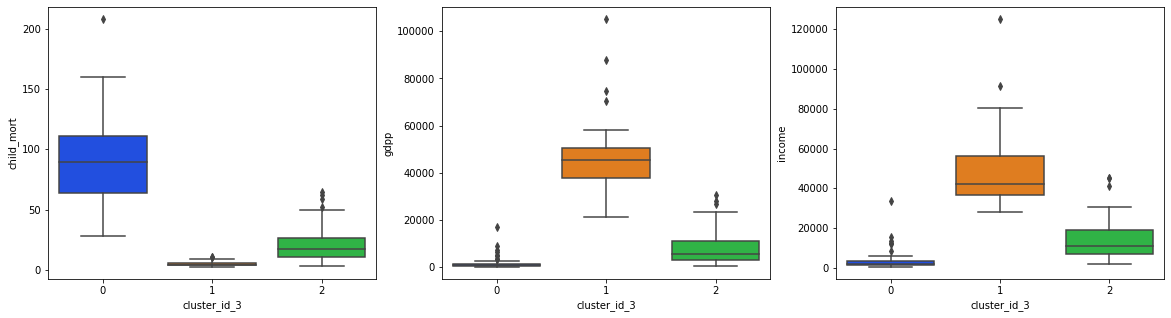

In [21]:
# Box plot on various variables against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=data_K_means, palette="bright")

plt.show()

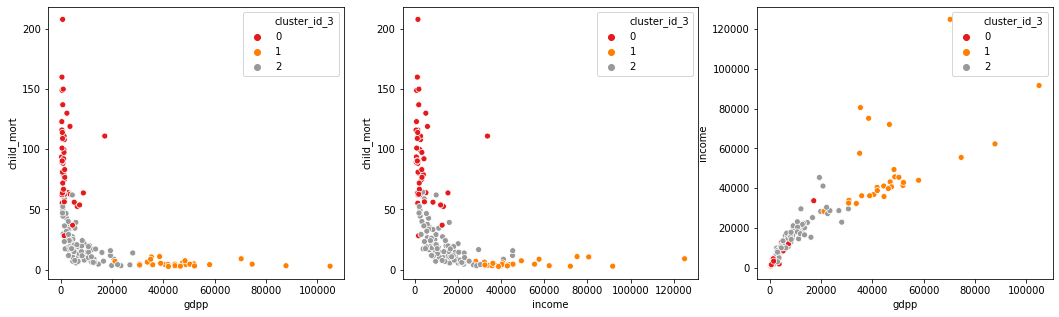

In [22]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',data=data_K_means,palette='Set1',legend='full')
plt.show()

In [23]:
# Checking the CLuster means:
data_K_means.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id_3,,,,,,,,,
0,91.610417,879.063542,114.821875,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333
2,20.357143,3604.149451,547.278901,3710.446374,13968.021978,7.070549,73.460440,2.235055,7979.912088
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714


<font color='darkblue'>Cluster 0 & Cluster 2 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.</font>

In [24]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708


In [25]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758


### Second Iteration - Using 4 Clusters

In [26]:
# K Means with with k=4

kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [27]:
kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [28]:
# assign the label
data_K_means['cluster_id_4'] = kmeans_4.labels_
data_K_means.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,1
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,1
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2,0


In [29]:
# Checking the number of countries in each cluster

data_K_means.cluster_id_4.value_counts()

0    88
1    48
3    29
2     2
Name: cluster_id_4, dtype: int64

#### Visualizing the Clustered Data

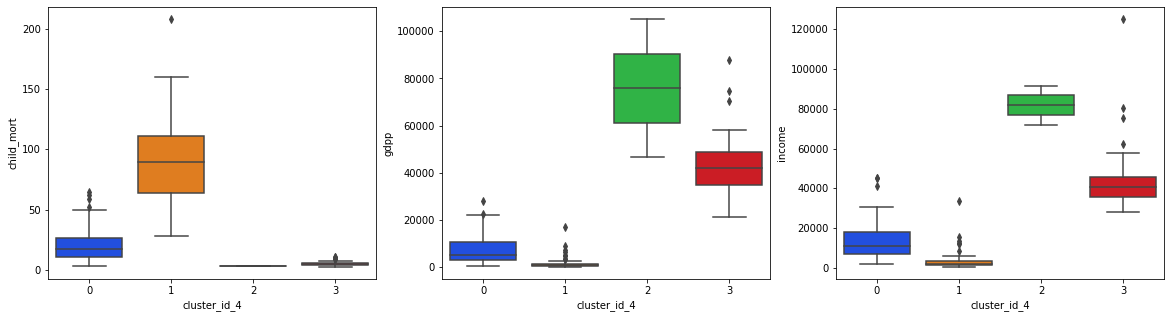

In [30]:
# Box plot on various variables against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=data_K_means, palette="bright")

plt.show()

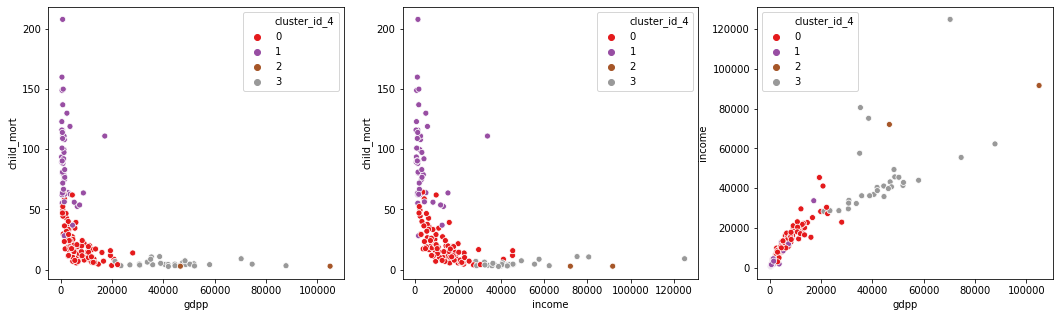

In [31]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',data=data_K_means,palette='Set1',legend='full')
plt.show()

In [32]:
# Checking the CLuster means:

data_K_means.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3
cluster_id_4,,,,,,,,,,
1,91.610417,879.063542,114.821875,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000
0,20.918182,3366.778409,482.897273,3461.435455,13455.568182,7.295045,73.222727,2.242159,7332.636364,2.000000
3,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,1.103448
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.000000


<font color='darkblue'>Cluster 1 & Cluster 0 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.</font>

In [33]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708


In [34]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_4'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758


### Third Iteration - Using 5 Clusters

In [35]:
# K Means with with k=5

kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_5.fit(scaled_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=335, tol=0.0001, verbose=0)

In [36]:
kmeans_5.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [37]:
# assign the label

data_K_means['cluster_id_5'] = kmeans_5.labels_
data_K_means.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4,cluster_id_5
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,1,1
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2,0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2,0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2,0,0


In [38]:
# Checking the number of countries in each cluster

data_K_means.cluster_id_5.value_counts()

0    87
1    47
3    30
2     2
4     1
Name: cluster_id_5, dtype: int64

#### Visualizing the Clustered Data

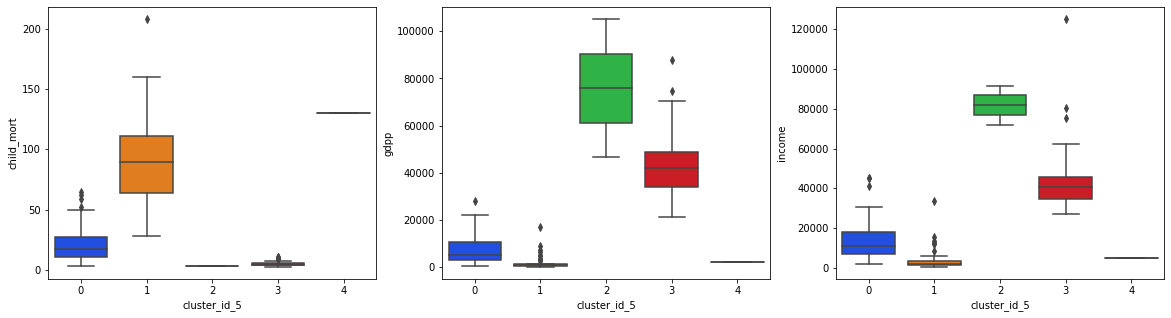

In [39]:
# Box plot on various variables against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='child_mort',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='gdpp',
            data=data_K_means, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='income',
            data=data_K_means, palette="bright")

plt.show()

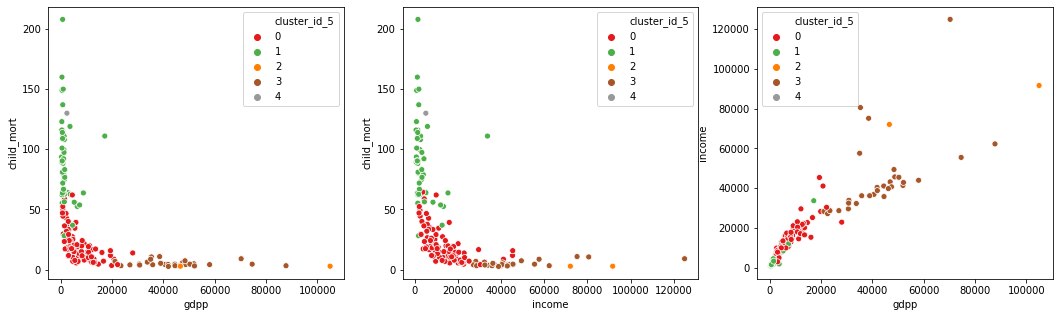

In [40]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',data=data_K_means,palette='Set1',legend='full')
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',data=data_K_means,palette='Set1',legend='full')
plt.show()

In [41]:
# Checking the CLuster means:

data_K_means.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_3,cluster_id_4
cluster_id_5,,,,,,,,,,,
4,130.000000,589.490000,118.130000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000,1.0
1,90.793617,885.224681,114.751489,835.999149,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,1.0
0,21.113793,3328.149425,459.999540,3404.497931,13297.586207,7.371506,73.147126,2.251954,7158.298851,2.000000,0.0
3,5.043333,21018.310000,4031.304333,17806.070000,45180.000000,2.764533,80.383333,1.799667,43300.000000,1.133333,2.9
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.000000,2.0


<font color='darkblue'>Cluster 4 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome.</font>

In [42]:
# Checking the countries in Cluster 4 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_5'] == 4].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
113,Nigeria,130.0,5150,2330


In [43]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

data_K_means[['country','child_mort','income','gdpp']][data_K_means['cluster_id_5'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True]).head()

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708


### Chosing the cluster : 3

<font color='darkblue'>-From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size.<br>-So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL.</font>

### Interpreting the Clusters from K-Means model

In [44]:
#New dataframe for group by & analysis

data_K_means_analysis =  data_K_means.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
data_K_means_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_4,cluster_id_5
cluster_id_3,,,,,,,,,,,
0,91.610417,879.063542,114.821875,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333,1.000000,1.062500
2,20.357143,3604.149451,547.278901,3710.446374,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.098901,0.131868
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,2.928571,2.928571


In [45]:
# Creating a new field for count of observations in each cluster

data_K_means_analysis['Observations']=data_K_means[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
data_K_means_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_4,cluster_id_5,Observations
cluster_id_3,,,,,,,,,,,,
0,91.610417,879.063542,114.821875,827.028750,3897.354167,11.911146,59.239583,4.992083,1909.208333,1.000000,1.062500,48
2,20.357143,3604.149451,547.278901,3710.446374,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.098901,0.131868,91
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,2.928571,2.928571,28


In [46]:
# Creating a new field for proportion of observations in each cluster

data_K_means_analysis['Proportion']=round(data_K_means_analysis['Observations']/data_K_means_analysis['Observations'].sum(),2)


#Summary View
data_K_means_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
cluster_id_3,,,,,
0,91.610417,3897.354167,1909.208333,48,0.29
2,20.357143,13968.021978,7979.912088,91,0.54
1,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

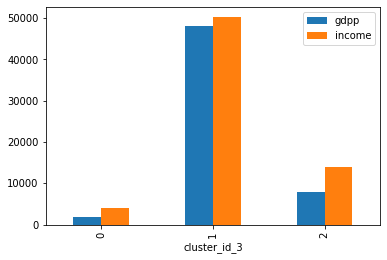

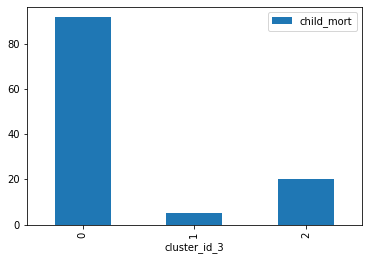

In [47]:
plt.figure(figsize=(8, 5))
data_K_means_plot1=data_K_means[['cluster_id_3','gdpp','income']].copy()
data_K_means_plot1=data_K_means_plot1.groupby('cluster_id_3').mean()
data_K_means_plot1.plot.bar()

data_K_means_plot2=data_K_means[['cluster_id_3','child_mort']].copy()
data_K_means_plot2=data_K_means_plot2.groupby('cluster_id_3').mean()
data_K_means_plot2.plot.bar()

### Interpretation of Clusters:
<font color='darkblue'>-Cluster 0 has the Highest average Child Mortality rate of ~92 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively.<br>-All these figures clearly makes this cluster the best candidate for the financial aid from NGO.<br>-We could also see that Cluster 0 comprises of ~29% of overall data, and has ~48 observations in comparison  to 167 total observations.</font>

-----

## Hierarchical Clustering

In [48]:
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178770,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


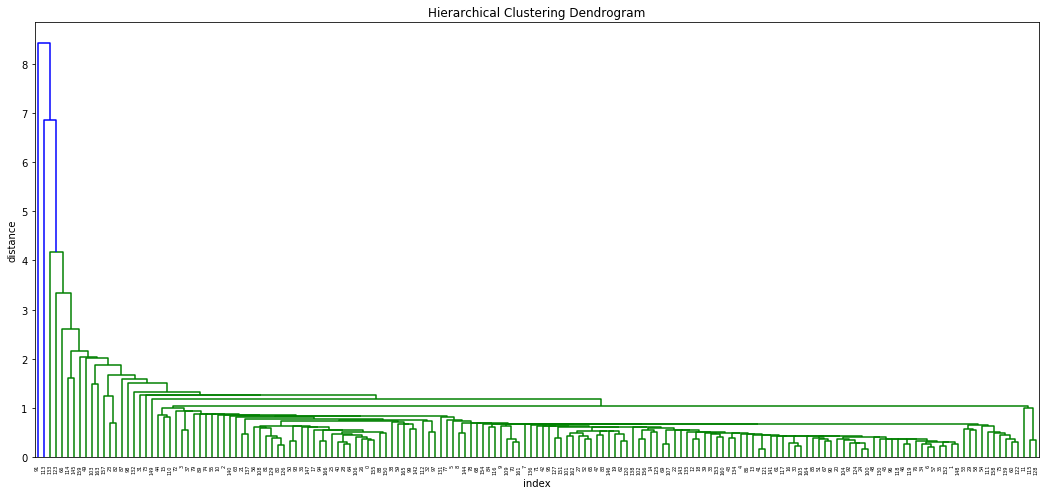

In [49]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

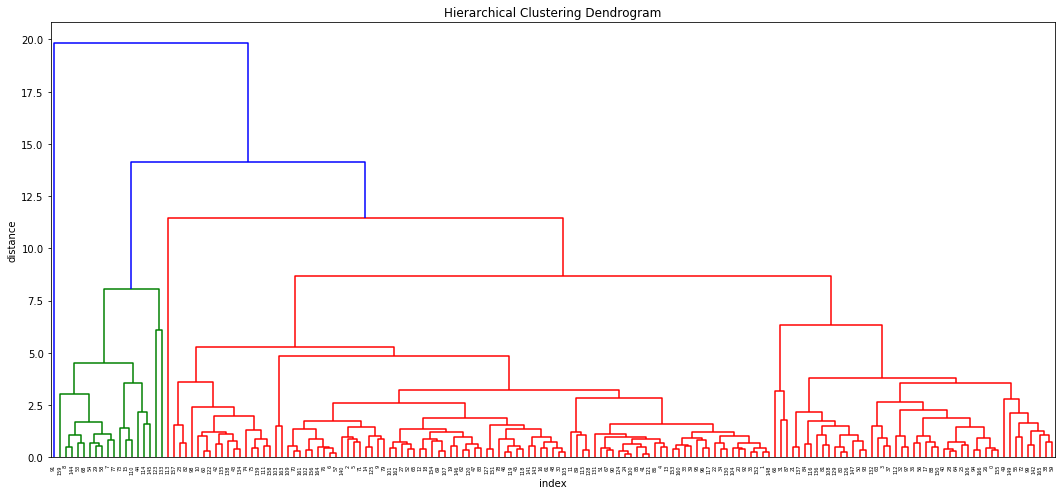

In [50]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

<font color='darkblue'>-From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation.<br>-So we will use Complete linkage output for our further analysis.<br>-We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.</font>

### First Iteration - Using 3 Clusters

In [51]:
# 3 clusters

cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [52]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [53]:
# Create a new datafame with cluster labels to it.

data_hier = data.copy()
data_hier['cluster_labels_3'] = cluster_labels_3

data_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0


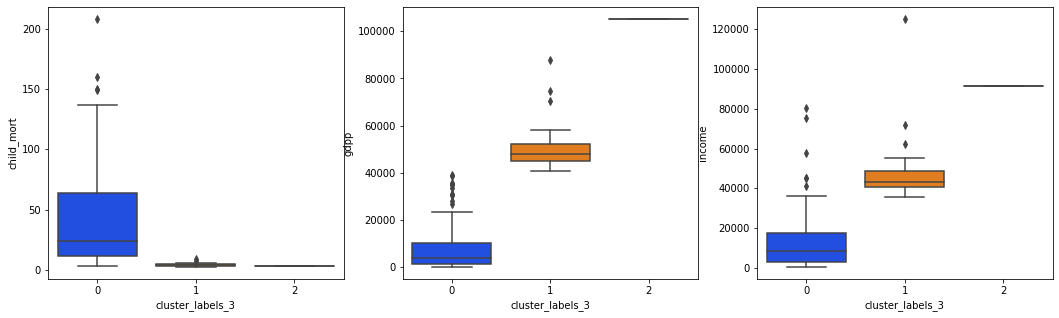

In [54]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=data_hier, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=data_hier, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=data_hier, palette="bright")

plt.show()

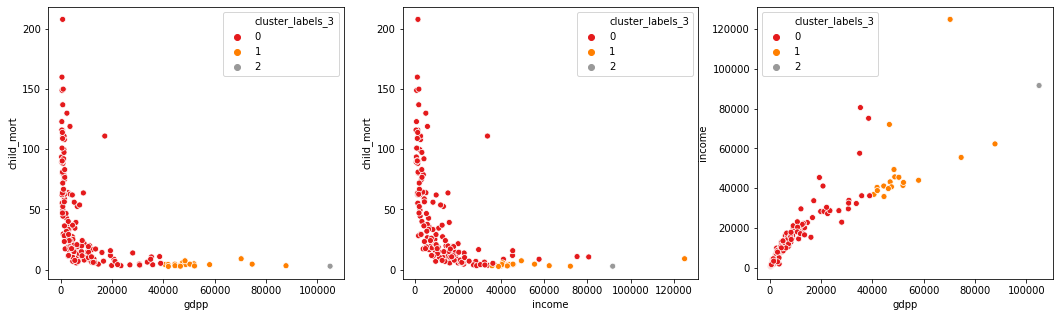

In [55]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',data=data_hier,palette='Set1',legend='full')
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',data=data_hier,palette='Set1',legend='full')
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',data=data_hier,palette='Set1',legend='full')
plt.show()

In [56]:
# Checking cluster count

data_hier.cluster_labels_3.value_counts()

0    148
1     18
2      1
Name: cluster_labels_3, dtype: int64

In [57]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

data_hier[data_hier['cluster_labels_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [58]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

data_hier[data_hier['cluster_labels_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1


<font color='darkblue'>-Cluster 1 & 2 seems to be Developed or Developing countries, so our segmentation is good in terms of all our under developed countries are segmented under cluster 0.<br>-We will further fine tune this cluster.</font>

### Second Iteration - Using 4 Clusters

In [59]:
# 4 clusters

cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [60]:
data_hier['cluster_labels_4'] = cluster_labels_4

data_hier.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,0,0


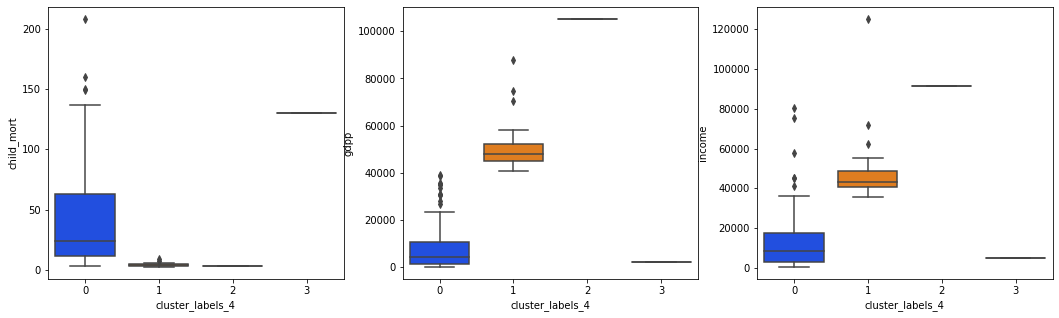

In [61]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=data_hier, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=data_hier, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=data_hier, palette="bright")

plt.show()

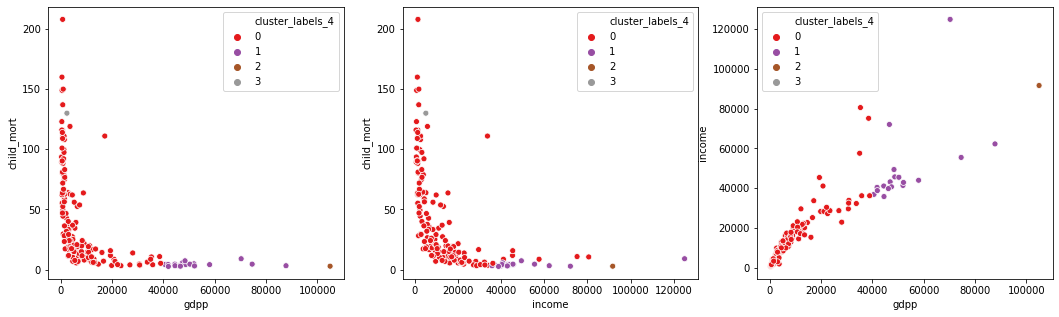

In [62]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',data=data_hier,palette='Set1',legend='full')
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',data=data_hier,palette='Set1',legend='full')
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',data=data_hier,palette='Set1',legend='full')
plt.show()

In [63]:
# Checking cluster count

data_hier.cluster_labels_4.value_counts()

0    147
1     18
3      1
2      1
Name: cluster_labels_4, dtype: int64

In [64]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

data_hier[data_hier['cluster_labels_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


In [65]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

data_hier[data_hier['cluster_labels_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
113,Nigeria,130.0,589.49,118.13,405.42,5150,104.0,60.5,5.84,2330,0,3


In [66]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

data_hier[data_hier['cluster_labels_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_3,cluster_labels_4
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1,1


<font color='darkblue'>-From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment.<br>-Since Nigera could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3.<br>-We will further validate with other methods below.</font>

### Interpreting the Clusters from Hierarchical model

In [67]:
#New dataframe for group by & analysis

data_hier_analysis =  data_hier.groupby(['cluster_labels_3']).mean()
data_hier_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4
cluster_labels_3,,,,,,,,,,
0,42.630405,3598.749662,511.945878,3451.232432,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [68]:
# Creating a new field for count of observations in each cluster

data_hier_analysis['Observations']=data_hier[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
data_hier_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_4,Observations
cluster_labels_3,,,,,,,,,,,
0,42.630405,3598.749662,511.945878,3451.232432,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [69]:
# Creating a new field for proportion of observations in each cluster

data_hier_analysis['Proportion']=round(data_hier_analysis['Observations']/data_hier_analysis['Observations'].sum(),2)
data_hier_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
cluster_labels_3,,,,,
0,42.630405,12641.641892,7551.445946,148,0.89
1,4.388889,50027.777778,52355.555556,18,0.11
2,2.800000,91700.000000,105000.000000,1,0.01


<Figure size 576x360 with 0 Axes>

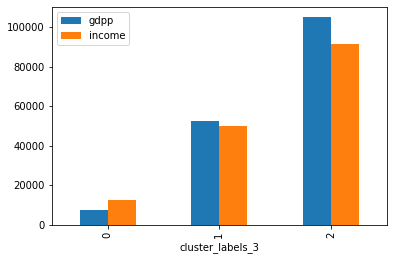

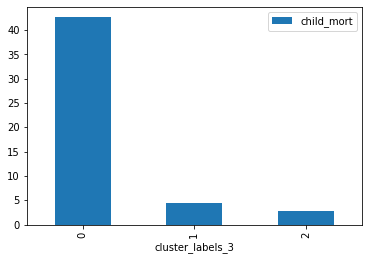

In [70]:
plt.figure(figsize=(8, 5))
data_hier_plot1=data_hier[['cluster_labels_3','gdpp','income']].copy()
data_hier_plot1=data_hier_plot1.groupby('cluster_labels_3').mean()
data_hier_plot1.plot.bar()

data_hier_plot2=data_hier[['cluster_labels_3','child_mort']].copy()
data_hier_plot2=data_hier_plot2.groupby('cluster_labels_3').mean()
data_hier_plot2.plot.bar()

### Interpretation of Clusters:

<font color='darkblue'>-Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively.<br>-All these figures clearly makes this cluster the best candidate for the financial aid from NGO.<br>-We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations,this seems to be a problem.<br>-This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster.<br>-We also saw that increasing the cluster number is not solving this problem.<br><br>- So we will go with K-Means Clustering.</font>

---

## Chosing K-Means clustering with 3 clusters and continuing our analysis:

### Final Cluster

#### Renaming the Clusters

    -Based on the interpretation of the cluster, we now rename all the clusters accordingly.
    -The Cluster 0 now becomes 'Under Developed Countries', which will be of our interest.
    -We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

In [71]:
data_K_means_analysis = data_K_means_analysis.rename({
    0: 'Under_Developed Countries',
    1: 'Developed Countries',
    2: 'Developing Countries'}).reset_index()

In [72]:
data_K_means_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

,cluster_id_3,child_mort,income,gdpp,Observations,Proportion
0,Under_Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


### Analysing the 'Under Developed Countries' Cluster

In [73]:
data_K_means.columns


Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_id_3',
       'cluster_id_4', 'cluster_id_5'],
      dtype='object')

In [74]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = data_K_means[data_K_means['cluster_id_3'] == 0][['country', 'child_mort', 'income', 'gdpp']].copy()
final_cluster.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
3,Angola,119.0,5900,3530
17,Benin,111.0,1820,758
21,Botswana,52.5,13300,6350
25,Burkina Faso,116.0,1430,575


In [75]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


### Decision Making on the final approach

In [76]:
final_cluster.describe()

,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


<font color='darkblue'>Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.</font>

### Fetching the final data based on Cluster Median

#### Data less than median of gdpp of the cluster

    We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.

In [77]:
Under_Developed_Countries = data[data['gdpp'] <= 932].copy()
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


In [78]:
Under_Developed_Countries.shape

(29, 10)

#### Data less than median of income of the cluster

    We could see that the Median values of income for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 1860.

In [79]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


In [80]:
Under_Developed_Countries.shape

(21, 10)

#### Data greater than median of child mortality rate of the final cluster

    We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.

In [81]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419


In [82]:
Under_Developed_Countries.shape

(14, 10)

### Descriptive Statistics of Cluster 'Under_Developed_Countries'

In [83]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [84]:
#Final country list

UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [85]:
UDC_top_10.describe()

,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


## Univariate Analysis of Cluster 'Under_Developed_Countries'

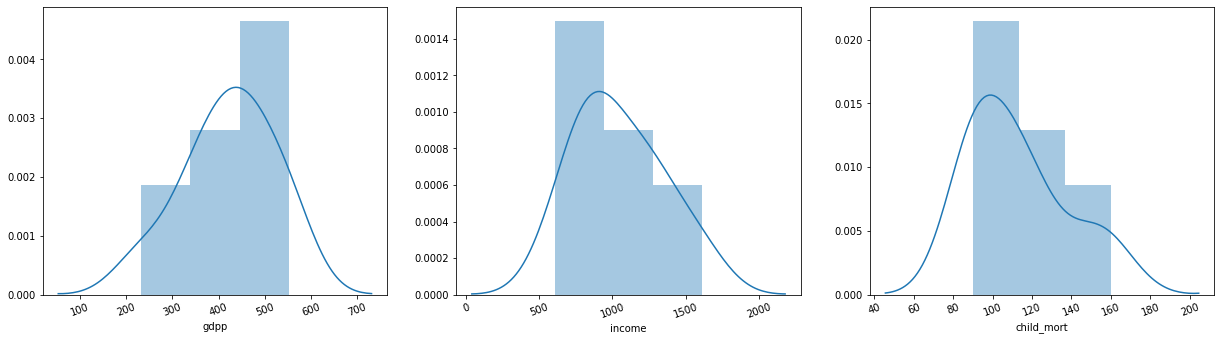

In [86]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

## Bivariate Analysis of Cluster 'Under_Developed_Countries'

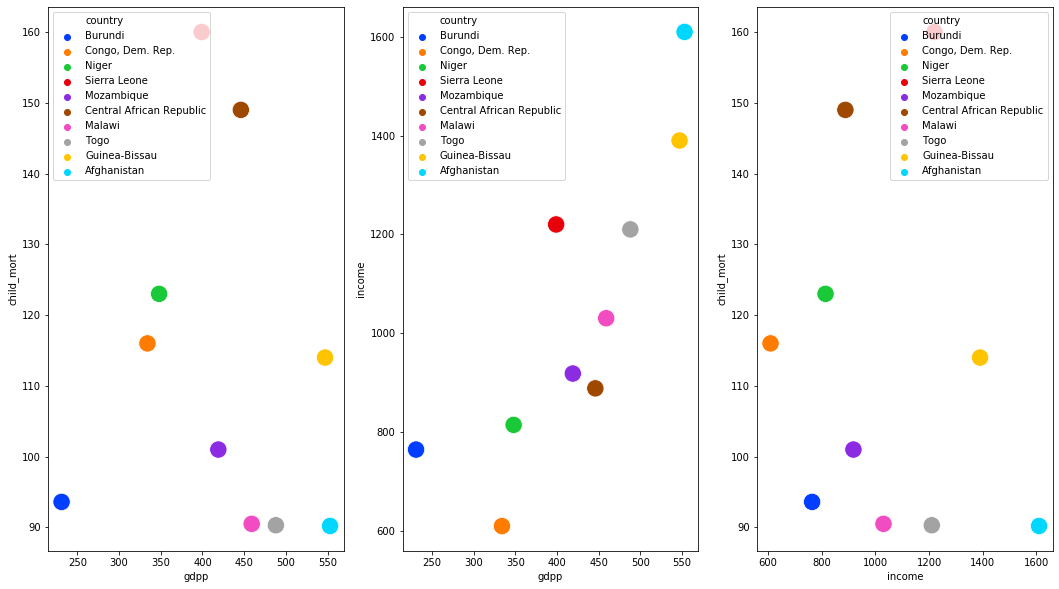

In [87]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

## Conclusion

      -We performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO.
      -Based on our Clustering Analysis, we have below the top countries under our 'Under Developed Countries' cluster which are in dire need of the Financial Aid.
    -This output is purely based on the dataset we used and various analytical methodology we performed.

In [88]:
#TOP COUNTRIES recommended for Financial Aid

UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2



    Countries those are in dire need of the Financial Aid are :
    -Burundi
	-Congo, Dem. Rep.
	-Niger
	-Sierra Leone
    -Mozambique
	-Central African Republic
	-Malawi
	-Togo
    -Guinea-Bissau
	-Afghanistan